#### Autor: Bernardo Salinas Jaquez
#### Fecha: Enero-2021
#### Clustering Jerárquico. Datos de calificaciones de clientes dentro de una tienda

### Objetivo
Aplicar el algoritmo de Clustering Jerárquico para separar a los usuarios de una tienda de acuerdo a sus calificaciones dadas a la tienda.

### Descripcíon
Se utilza mediante comandos e instrucciones de Python y un conjunto de datos sobre las calificaciones otorgadas por sus clientes a una tienda, el algoritmo clustering jerárquico de forma Aglomerante trata de agrupar estos usuarios de acuerdo a sus ingresos anuales y sus calificaciones a la tienda.

### Fundamento teórico
Como su nombre lo indica, el clustering Jerárquico construye una jerarquía de clusters para realizar el análisis y existen dos categorías para este tipo de clustering: [Avila, 2020]

* Aglomerante
* Divisivo

Para representar los resultados de la jerarquía de grupos se usa el dendograma que muestra las jerarquías de acuerdo a las distancias que existen entre los elementos del conjunto de datos, las cuales se pueden representar en una matriz de distancias. [Avila, 2020]

**Clustering Jerárquico Aglomerante**

Es una aproximación de abajo hacia arriba (bottom-up) donde se dividen los clusters en subclusters y así sucesivamente. Iniciando asignando cada muestra simple a un cluster y en cada iteración sucesiva va aglomerando (mezclando) el par de closters más cercanos satisfaciendo algún criterio de similaridad, hasta que todos los elementos pertenecen a un solo cluster. Los clusters generados en los primeros pasos son anidados con los clusters generados en los siguientes pasos. [Avila, 2020]

El proceso de cluster aglomerante es el siguiente:

* Primero asigna cada elemento a un cluster
* Después encuentra la matriz de distancias
* Encuentra 2 clusters que tengan la distancia más corta y los mezcla
* Continua este proceso hasta que se forma un solo cluster grande


**Clustering Jerárquico Divisivo**

Este tipo de clustering se lleva a cabo con un enfoque de arriba hacia abajo (top-down), Se inicia con todos los elementos asignado a un solo cluster y sigue el algoritmo hasta que cada elemento es un cluster individual. [Avila, 2020]

A diferencia del enfoque de abajo hacia arriba donde las decisiones para generar los clusters se basan en lo patrones locales sin tomar en cuenta la distribución global, el enfoque de arriba hacia abajo se beneficia de la información completa sobre la distribución global al ir haciendo las particiones. [Avila, 2020]



#### 1. Cargar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#### 2. Cargar datos

* Mostrar los primeros cinco registros
* Mostrar los ultimos cinco registros

In [5]:
datos = pd.read_csv("https://raw.githubusercontent.com/BernardoSJ/Casos-analisis-inteligente-de-datos/main/datos/Mall_Customers.csv", delimiter=",")
datos.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
datos.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


#### 3. Descripción de los datos

(Las marcadas en negritas son con las que se entrena el modelo)

* CustomerID - Id del cliente
* Genre - Genero
* Age - Edad
* **Annual Income – Ingresos anuales en miles de los clientes** 
* **Spending Score – Calificación de los usuarios a la tienda**


#### 4. Visualización de los datos

Dendograma para saber el número ideal de cluster

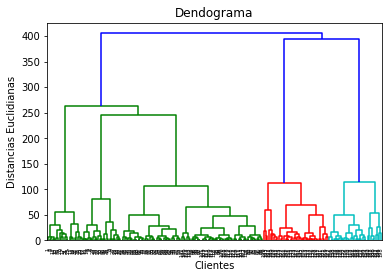

In [7]:
X = datos.iloc[:, [3, 4]].values
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

Podemos observar que la distancia máxima la marca la línea azul oscuro que une los clusters rojo y azul claro, por lo que si realizamos un corte en esa zona obtenemos:
La distancia máxima, nos genera 5 clusters.

#### 5. Creación del modelo

Con el método aglomerante utilizando la clase AgglomerativeClustering, se crean 5 clusters para agrupar a los clientes y además se realiza una gráfica de esos cluster

In [9]:
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

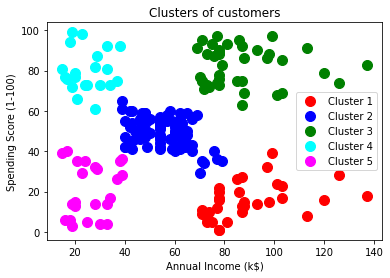

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cantidad de usuarios por Cluster

In [11]:
copy =  pd.DataFrame()

copy['label'] = y_hc;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,Cluster 1,32
1,Cluster 2,85
2,Cluster 3,39
3,Cluster 4,21
4,Cluster 5,23


#### 6. Interpretación


Para este caso, se utilizó un conjunto de datos en donde venían 200 datos de una tienda que ha calificado a sus clientes con una puntuación que va de 1 a 100 de acuerdo a su frecuencia de compra y otras condiciones que ha utilizado dicha tienda para calificar a sus clientes con esa puntuación. En el conjunto de datos vienen los siguientes campos:
(Las marcadas en negritas son con las que se entrena el modelo)

* CustomerID - Id del cliente
* Genre - Genero
* Age - Edad
* **Annual Income – Ingresos anuales en miles de los clientes** 
* **Spending Score – Calificación de los usuarios a la tienda**

Para este caso en donde se aplica el algoritmo de clustering jerárquico de manera aglomerante. De acuerdo al dendograma que fue generado en la parte de visualización de datos en este se vio que el número de clusters ideal es de 5 ya que ahí en ese punto es en donde los datos se podrían agrupar de mejor manera.
Una aplicación importante de los modelos de clustering es en los negocios ya que por ejemplo para este caso, por el conjunto de datos, cuando se aplica el modelo de clustering jerárquico, podemos realizar una gráfica en donde se ven los distintos clusters y lo que se interpreta de esta es lo siguiente:

En la gráfica se ve una relación del ingreso anual en miles y la puntuación generada por la tienda, aquí se pueden ver los clientes que podrían ser de interes para la tienda. Por ejemplo en el grupo de clientes en color verde, lo cuales tienen ingresos altos y una puntuación alta, a estos la tienda les ppdría ofrecer algún tipo de promoción. En purpura tenemos a los clientes de baja puntuación y bajos ingresos, mientras que, en azul claro, a los clientes con ingresos bajos pero con alta puntuación, lo cual indica que estos clientes realizan muchas compras a pesar de que tienen bajos ingresos.


#### 7. Bibliografia

Información del caso y teoría del algoritmo:

Avila Jacob. (2020). *Clustering Jerárquico con Python*. 4 de enero de 2021, Sitio web: https://www.jacobsoft.com.mx/es_mx/clustering-jerarquico-con-python/